In [9]:
import pandas as pd
df = pd.read_csv("clientes_limpio.csv")
df.sample(5)

,Evasion,Genero,Mayor_65,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,TV,Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
2701,0.0,Male,0,1,1,7,1,0,No,0,...,0,0,0,0,One year,0,Mailed check,20.65,150.00,0.688333
2523,0.0,Male,1,1,0,71,0,0,DSL,0,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),52.30,3765.05,1.743333
2703,0.0,Female,0,1,1,13,1,0,No,0,...,0,0,0,0,Month-to-month,1,Mailed check,20.45,254.50,0.681667
892,1.0,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,Month-to-month,0,Electronic check,54.30,195.30,1.810000
3811,1.0,Male,0,0,0,13,1,0,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,80.85,1008.70,2.695000


In [12]:
df = df.drop(columns=["customerID"])

df.to_csv("clientes_limpio.csv", index=False)

KeyError: "['customerID'] not found in axis"

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.to_csv("clientes_encoded.csv", index=False)

print("Transformación completada. Archivo guardado como 'clientes_encoded.csv'")
print(df_encoded.head())

Transformación completada. Archivo guardado como 'clientes_encoded.csv'
   Evasion  Mayor_65  Tiene_Pareja  Tiene_Dependientes  Meses_Contrato  \
0      0.0         0             1                   1               9   
1      0.0         0             0                   0               9   
2      1.0         0             0                   0               4   
3      1.0         1             1                   0              13   
4      1.0         1             1                   0               3   

   Telefono  Multiples_Lineas  Seguridad_Online  Respaldo_Online  \
0         1                 0                 0                1   
1         1                 1                 0                0   
2         1                 0                 0                0   
3         1                 0                 0                1   
4         1                 0                 0                0   

   Proteccion_Dispositivo  ...  Cargo_Total  Cargo_Diario  Genero_Male  \


In [13]:
conteo = df["Evasion"].value_counts(normalize=True) * 100
print(conteo)


Evasion
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64


In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_encoded = pd.read_csv("clientes_encoded.csv")

print("Valores nulos por columna:")
print(df_encoded.isna().sum())

df_encoded = df_encoded.dropna(subset=["Evasion"])

X = df_encoded.drop("Evasion", axis=1)
y = df_encoded["Evasion"]

print("\nDistribución original corregida:")
print(y.value_counts(normalize=True) * 100)

undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
print("\nUndersampling:")
print(y_under.value_counts(normalize=True) * 100)

oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
print("\nOversampling:")
print(y_over.value_counts(normalize=True) * 100)

smote = SMOTE(random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)
print("\nSMOTE:")
print(y_smote.value_counts(normalize=True) * 100)


Valores nulos por columna:
Evasion                                224
Mayor_65                                 0
Tiene_Pareja                             0
Tiene_Dependientes                       0
Meses_Contrato                           0
Telefono                                 0
Multiples_Lineas                         0
Seguridad_Online                         0
Respaldo_Online                          0
Proteccion_Dispositivo                   0
Soporte_Tecnico                          0
TV                                       0
Peliculas                                0
Factura_Digital                          0
Cargo_Mensual                            0
Cargo_Total                              0
Cargo_Diario                             0
Genero_Male                              0
Servicio_Internet_Fiber optic            0
Servicio_Internet_No                     0
Tipo_Contrato_One year                   0
Tipo_Contrato_Two year                   0
Metodo_Pago_Credit card (au

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote
)

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
print("Regresión Logística (con escalado):", pipe_lr.score(X_test, y_test))

pipe_rf = Pipeline([
    ("clf", RandomForestClassifier(random_state=42))
])

pipe_rf.fit(X_train, y_train)
print("Random Forest (sin escalado):", pipe_rf.score(X_test, y_test))


Regresión Logística (con escalado): 0.8208521626856036
Random Forest (sin escalado): 0.841187863137508


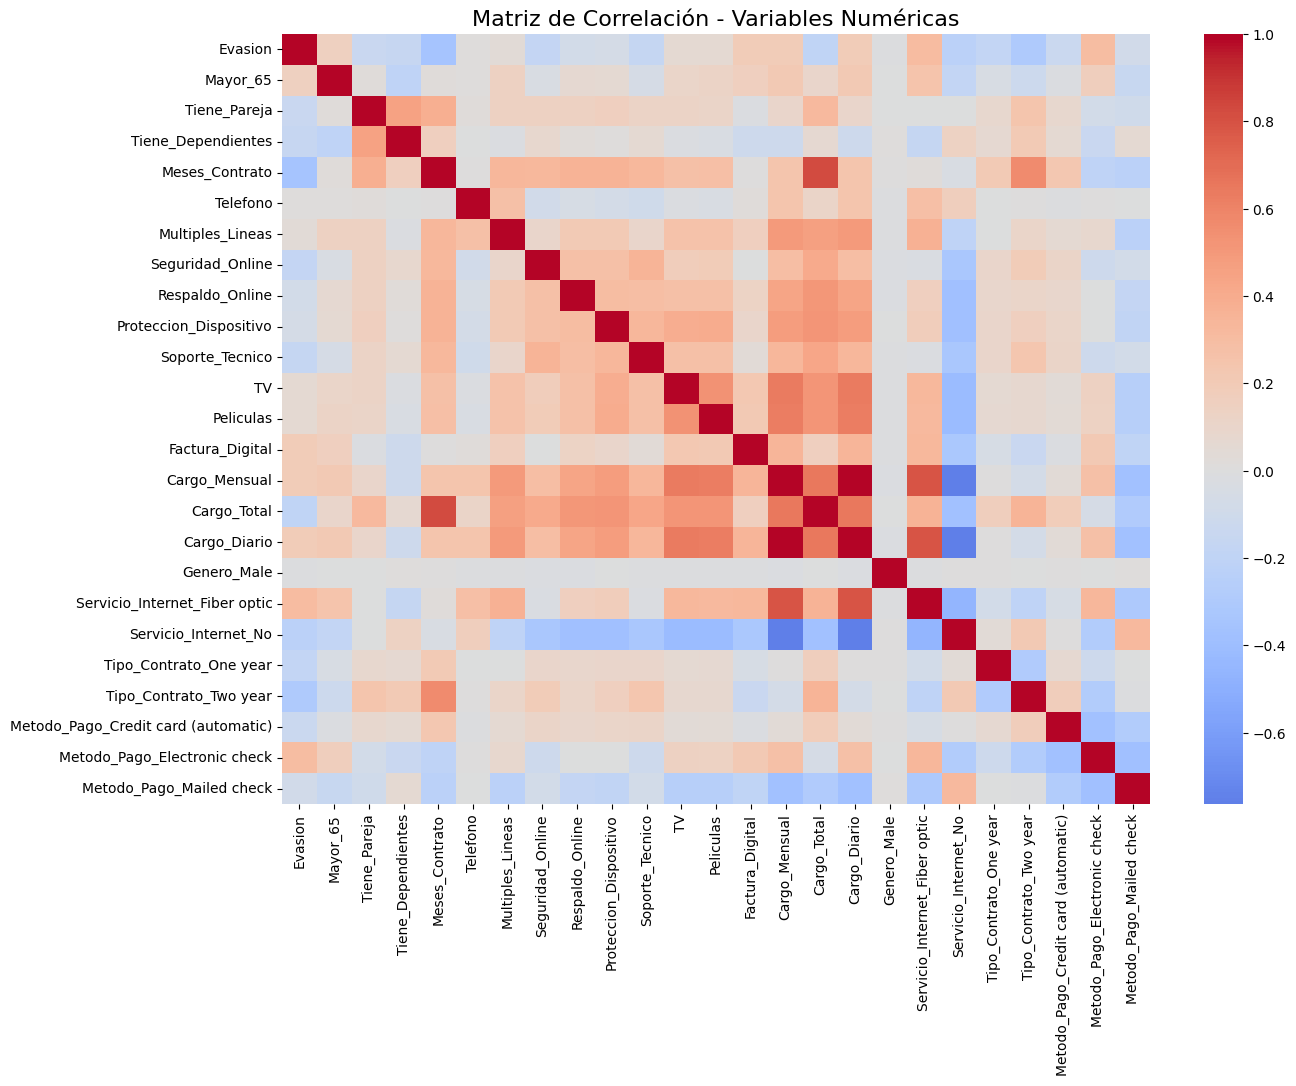

Correlaciones con Evasion:
Evasion                                1.000000
Servicio_Internet_Fiber optic          0.307463
Metodo_Pago_Electronic check           0.301455
Cargo_Diario                           0.192858
Cargo_Mensual                          0.192858
Factura_Digital                        0.191454
Mayor_65                               0.150541
TV                                     0.063254
Peliculas                              0.060860
Multiples_Lineas                       0.040033
Telefono                               0.011691
Genero_Male                           -0.008545
Proteccion_Dispositivo                -0.066193
Respaldo_Online                       -0.082307
Metodo_Pago_Mailed check              -0.090773
Metodo_Pago_Credit card (automatic)   -0.134687
Tiene_Pareja                          -0.149982
Tiene_Dependientes                    -0.163128
Soporte_Tecnico                       -0.164716
Seguridad_Online                      -0.171270
Tipo_Contrato

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=16)
plt.show()

corr_target = corr["Evasion"].sort_values(ascending=False)
print("Correlaciones con Evasion:")
print(corr_target)


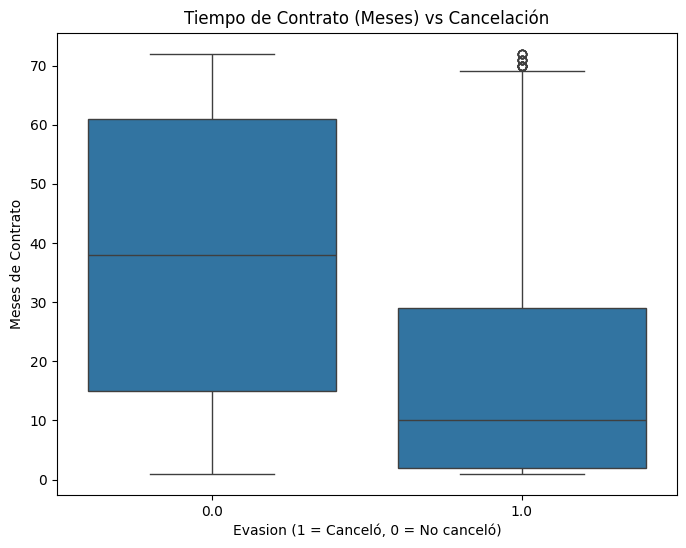

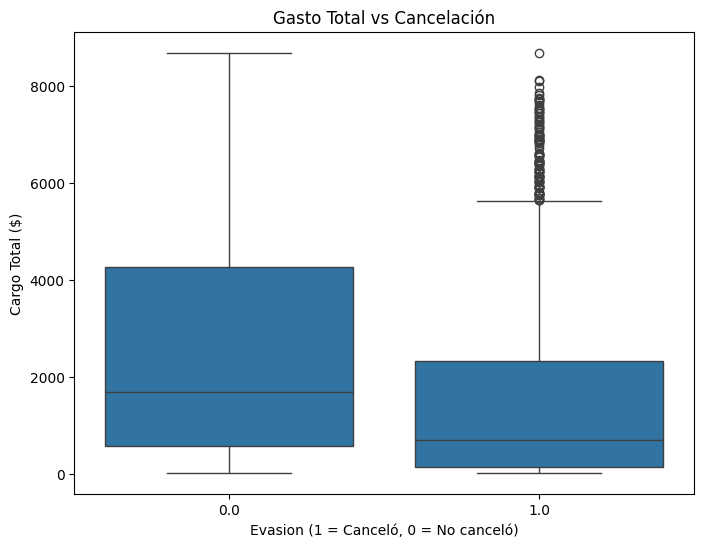

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="Evasion", y="Meses_Contrato", data=df_encoded)
plt.title("Tiempo de Contrato (Meses) vs Cancelación")
plt.xlabel("Evasion (1 = Canceló, 0 = No canceló)")
plt.ylabel("Meses de Contrato")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Evasion", y="Cargo_Total", data=df_encoded)
plt.title("Gasto Total vs Cancelación")
plt.xlabel("Evasion (1 = Canceló, 0 = No canceló)")
plt.ylabel("Cargo Total ($)")
plt.show()



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote,
    test_size=0.3,
    random_state=42,
    stratify=y_smote
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])
print("\nDistribución en Train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribución en Test:")
print(y_test.value_counts(normalize=True) * 100)


Tamaño del conjunto de entrenamiento: 7228
Tamaño del conjunto de prueba: 3098

Distribución en Train:
Evasion
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64

Distribución en Test:
Evasion
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


In [38]:
df = df.dropna(subset=['Evasion'])
X = df.drop('Evasion', axis=1)
y = df['Evasion']
categorical_cols = ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# X ya con dummies
X = pd.get_dummies(df.drop('Evasion', axis=1),
                   columns=['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'],
                   drop_first=True)
y = df['Evasion']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\n=== Árbol de Decisión ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))



=== Regresión Logística ===
Accuracy: 0.8028436018957346
[[1389  160]
 [ 256  305]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


=== Árbol de Decisión ===
Accuracy: 0.7834123222748816
[[1358  191]
 [ 266  295]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1549
         1.0       0.61      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.78      0.78      2110



**Regresión Logística**

Accuracy: 0.803

Recall clase 1 (evasores): 0.54 → muchos evasores no detectados

F1-score clase 1: 0.59

Mejor desempeño general que el árbol, especialmente para la clase minoritaria.

**Árbol de Decisión**

Accuracy: 0.783

Recall clase 1: 0.53

F1-score clase 1: 0.56

Peor que la regresión logística en todas las métricas.

**Conclusión**

Mejor modelo: Regresión Logística.

Problema común: underfitting en la clase 1 (evasores), por desbalance de clases.

Recomendación: balancear clases (SMOTE o class_weight='balanced') y ajustar hiperparámetros para mejorar recall de evasores.

In [40]:
import pandas as pd
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)
print(coef_df)


                               Variable  Coeficiente
14                          Cargo_Total     0.645624
17        Servicio_Internet_Fiber optic     0.625570
10                                   TV     0.213809
22         Metodo_Pago_Electronic check     0.183537
12                      Factura_Digital     0.180591
11                            Peliculas     0.168181
5                      Multiples_Lineas     0.135437
0                              Mayor_65     0.095045
8                Proteccion_Dispositivo     0.043976
23             Metodo_Pago_Mailed check     0.006014
16                          Genero_Male    -0.022147
4                              Telefono    -0.024323
7                       Respaldo_Online    -0.025317
2                    Tiene_Dependientes    -0.027409
21  Metodo_Pago_Credit card (automatic)    -0.034819
1                          Tiene_Pareja    -0.047815
6                      Seguridad_Online    -0.090839
9                       Soporte_Tecnico    -0.

Las variables económicas y de contrato (Cargo_Total, Meses_Contrato, Tipo_Contrato) tienen el mayor impacto.

Algunas variables de servicios (Servicio_Internet_Fiber optic, TV, Peliculas) también influyen, pero menos.

Variables demográficas (Mayor_65, Genero_Male, Tiene_Pareja) tienen impacto menor.